# Exemplos de plot

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

filepath=os.path.join("..","02.codigo")
sys.path.append(filepath)

from funcoes_plot import *

%reload_ext autoreload
%autoreload 2

In [3]:
TIPO_DE_COMPRESSAO = 'gzip'

In [4]:
diretorio_leitura = os.path.join("..","03.dataset")

In [5]:
df = pd.read_csv(os.path.join(diretorio_leitura, "df.csv.gz"), compression=TIPO_DE_COMPRESSAO, parse_dates=['Date'], index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5437 entries, 2003-10-16 to 2019-10-18
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Vazao OQ 1 (11FC50.PV)                    5437 non-null   float64
 1   Vazao OQ 2 (11FC52.PV)                    5437 non-null   float64
 2   Vazao OQ 3 (11FC55.PV)                    5437 non-null   float64
 3   Pressao torre (11PC53.PV)                 5437 non-null   float64
 4   HCs Totais AP (11SC501_HC.L)              2946 non-null   float64
 5   Cloreto (purga) (11SC50_CL.L)             2946 non-null   float64
 6   pH (purga) (11SC50_PH.L)                  5436 non-null   float64
 7   Temperatura OQ saida 11T15 (11TR0001.AO)  5437 non-null   float64
 8   Temperatura topo torre (11TR0023.AO)      5437 non-null   float64
 9   Temperatura OQ entrada (11TR28.AO)        5437 non-null   float64
 10  Cp tubo           

In [7]:
df.head()

,Vazao OQ 1 (11FC50.PV),Vazao OQ 2 (11FC52.PV),Vazao OQ 3 (11FC55.PV),Pressao torre (11PC53.PV),HCs Totais AP (11SC501_HC.L),Cloreto (purga) (11SC50_CL.L),pH (purga) (11SC50_PH.L),Temperatura OQ saida 11T15 (11TR0001.AO),Temperatura topo torre (11TR0023.AO),Temperatura OQ entrada (11TR28.AO),Cp tubo,Vazao tubo,Vazao casco,Calor Trocado
Date,,,,,,,,,,,,,,
2003-10-16,1916.08,2457.67,1511.83,5.80006,NaN,NaN,9.3483,180.429,163.911,194.604,0.477626,5885.58,805.785892,3.984739e+07
2003-10-17,2084.93,2796.98,1241.54,5.79994,NaN,NaN,9.0417,182.046,163.934,196.950,0.478897,6123.45,883.846684,4.370602e+07
2003-10-18,1974.71,2838.89,1528.87,5.79958,NaN,NaN,8.8500,180.357,163.921,193.208,0.477155,6342.47,786.468084,3.889147e+07
2003-10-19,2124.84,2860.31,1530.31,5.79904,NaN,NaN,8.9371,179.562,163.944,193.478,0.476986,6515.46,874.596738,4.324792e+07
2003-10-20,2163.21,2810.20,1528.71,5.79962,NaN,NaN,8.9883,178.295,163.910,192.371,0.476224,6502.12,881.383546,4.358588e+07


### Tipos de plot

[1 - Plot Simples](#1p) |
[2 - Plot Média Móvel](#2p) |
[3 - Plot da Tendência Móvel](#3p) |
[4 - Plot o erro ABS duas variáveis](#4p) |
[5 - Plot destacando momentos específicos de treino](#5p) |
[6 - Plot destacando momentos específicos na horizontal de treino](#6p) |
[7 - Plot para destaque de dias](#7p) |
[8 - Plot reta de tendência](#8p) |
[9 - Análise da Distribuição e boxplot](#9p) 
[10 - Plot Correlação](#10p) |
[11 - Plot boxplot](#11p) |

### Parametros

In [8]:
params = {
    'ylabel': 'Descrição da label para o eixo y', # (Default: '')
    'xlabel': 'Descrição da label para o eixo x', # (Default: 'Data')
    'titulo':'Título para o gráfico', # (Default: '')
    'days_interval':2, # Intervalo de dias que será plotado (Default: 2)
    'minutes_interval':180, # Intervalo de minutos que será plotado (Default: 180)
    'save_figure_name':'Figura', #Nome do arquivo da imagem do gráfico que será salvo (Default: '')
    'error': False,# Erro entre duas variáveis (Default: False)
    'abs_error':False, # Erro absoluto entre duas variáveis (Default: False)
    'rolling_time':0 , # Janela do filtro de média móvel a ser calculada(Default: 0)
    'figure_heigh': 10, # Altura da figura do gráfico (Default: 10)
    'figure_width':30 , # Comprimento da figura do gráfico (Default: 30)
    'ticks': [], # Ticks do eixo Y a serem personalizado (Default: []) Ex:[0, 1, 0.1] ==>> eixo y == [0,0.1,0.2,...,0.8,0.9,1]
    'tendencia':[], # Plota a curva de cada variável e sua respectiva tendência (Default.: False)
    'label_font_size':18, # Tamanho da fonte da label (eixos) (Default: 18)
    'label_font_weight':'bold', # Espessura da fonte do label (eixos) (Default: 'bold')
    'title_font_weight':'bold', # Espessura da fonte do título  (Default: 'bold')
    'tick_font_weight':'bold', # Espessura da fonte do tick  (Default: 'bold')
    'tick_font_size':14, # Tamanho da fonte da tick  (Default: 14)
    'legenda_font_size':16, # Tamanho da fonte da legenda  (Default: 16)
    'treino_true_data':[], # Janela do treino limpo para ser destacada (Ex.: [(data_ini:str, data_fim:str)])
    'treino_true_color':'green', # Cor do bloco de treino limpo (Ex.: 'green')
    'treino_true_alpha':0.3, # Quantidade de transparencia do bloco de treino limpo (Default.: 0.3)
    'treino_true_label':'Período de Treino Bom', # Legenda do bloco de treino limpo (Default.: 'Período de Treino Limpo)
    'treino_false_data':[] , # Janelas do treino sujo para ser destacada (Ex.: [(data_ini:str, data_fim:str)])
    'treino_false_color':'red', # Cor do bloco de treino sujo (Ex.: 'red')
    'treino_false_alpha':0.3, # Quantidade de transparência do bloco de treino sujo (Default.: 0.3)
    'treino_false_label':'Período de Treino Ruim', # Legenda do bloco de treino sujo (Default.: 'Período de Treino Sujo)
    'bloco_destaque_data':[], # Janelas do bloco extra para ser destacada (Ex.: [(data_ini:str, data_fim:str)])
    'bloco_destaque_color':'yellow', # Cor do bloco extra (Ex.: 'yellow')
    'bloco_destaque_label':'Período Extra', # Legenda do bloco extra (Default.: 'Período Extra')
    'bloco_destaque_alpha':0.3, # Quantidade de transparencia do bloco extra (Default.: 0.3)
    'dia_destaque_data':[], # Datas a serem destacada (Ex.:[data])
    'dia_destaque_color':'red', # Cor da data destacada (Default: 'red')
    'dia_destaque_label':'Dia Destaque', #Descrição da data destacada (Default: 'Dia Destaque')
    'reta_tendencia_data':[], # Períodos das retas de tendências a serem plotadas (Ex.: [(data_ini, data_fim)])
    'reta_tendencia_color':['darkmagenta'],# Cores a serem definidas para cada reta de tendência
    'reta_tendencia_label':['Reta de Tendência'], # Descrição na legenda de cada reta de tendência (Default:[Reta de Tendência])
    'reta_tendencia_ordem':[1], # Descrição da ordem do FIT de todas as linhas de tendência (Default: [1])
    'interval_yticker':0.1,# Intervalo inteiro no qual será distribuído os valores do eixo Y 
    'show_legenda':True,# Mostrar a legenda (Default:True)
    'label_legenda':'nome da variavel',# Descrição da label para a legenda (Default: nome da variavel)
    'linestyle':'-', # Estilo da linha (Default: '-') Ex:'-' ==> ______ | ':' => ...... | '-.' ==> --.--. | '--' ==> ------
    'marker':'o',# Marcação do ponto no gráfico (Default:'o')  Ex: '.' ',' 's' '*'  ... 
    'linewidth':1.5,# Espessura da linha (Default: 1.5)
    'treino_true_h_data': [], 
    'treino_false_h_data':[],
    'bloco_destaque_h_data':[],
}

***
<a id='1p'></a>
### 1 - Plot Simples

(5435, 14)


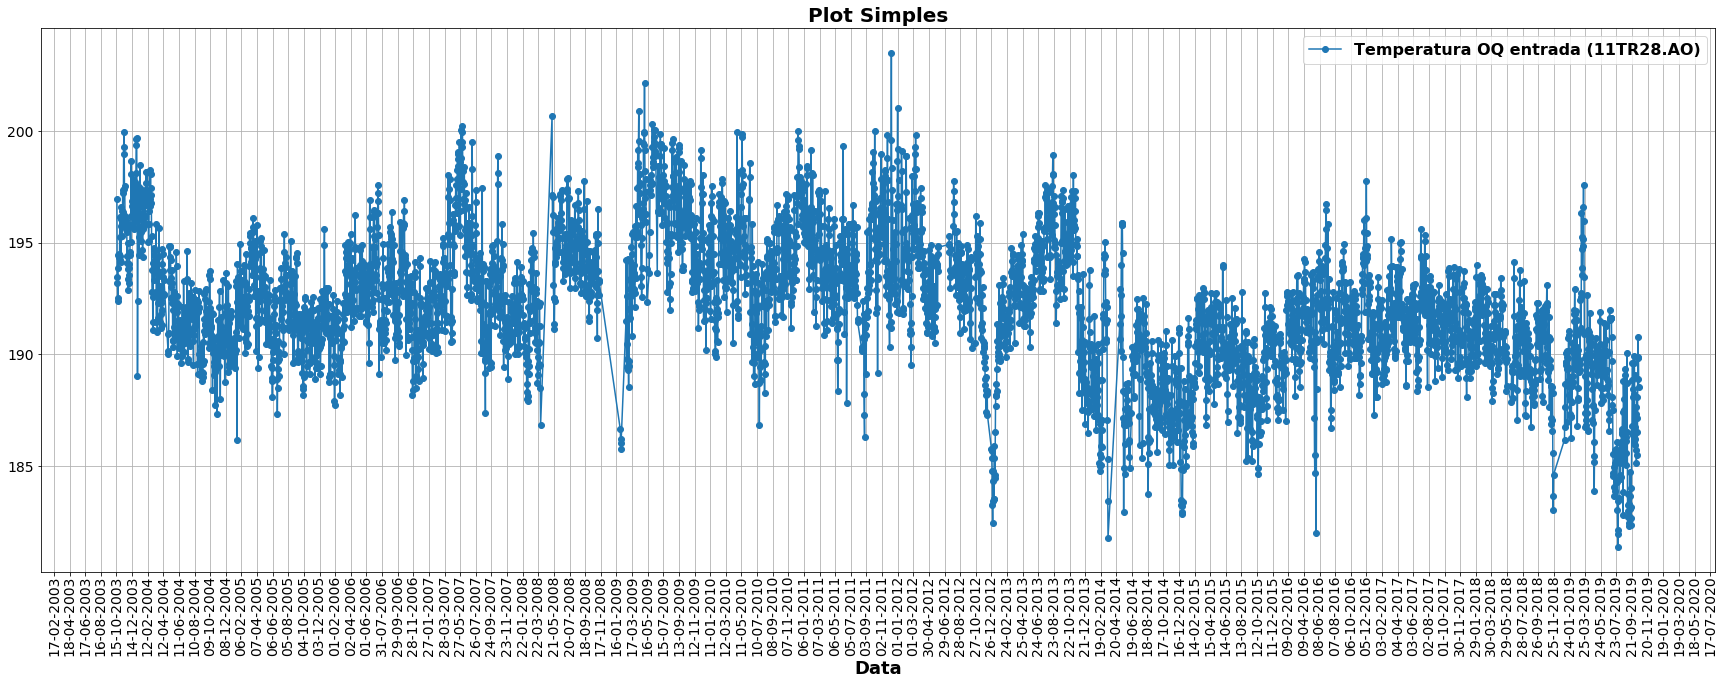

In [9]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot Simples',
}

plot_full(df, ['Temperatura OQ entrada (11TR28.AO)'] , ini, fim, **params);

(5435, 14)


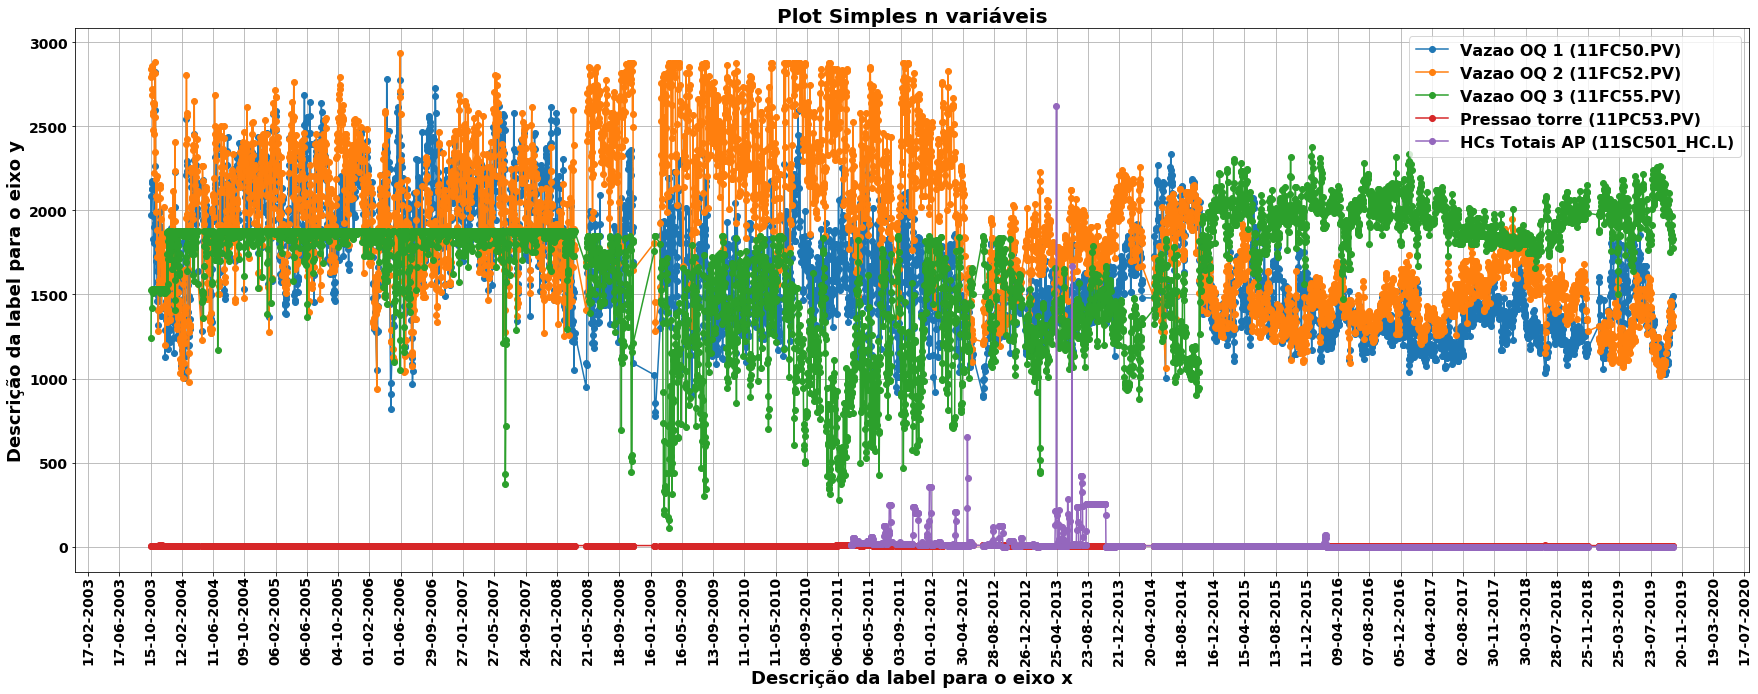

In [10]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':120,
    'titulo': 'Plot Simples n variáveis',
    'ylabel': 'Descrição da label para o eixo y',
    'xlabel': 'Descrição da label para o eixo x',
}

plot_full(df, df.columns[0:5] , ini, fim, **params);

***
<a id='2p'></a>
### 2 - Plot Média Móvel

(5435, 14)


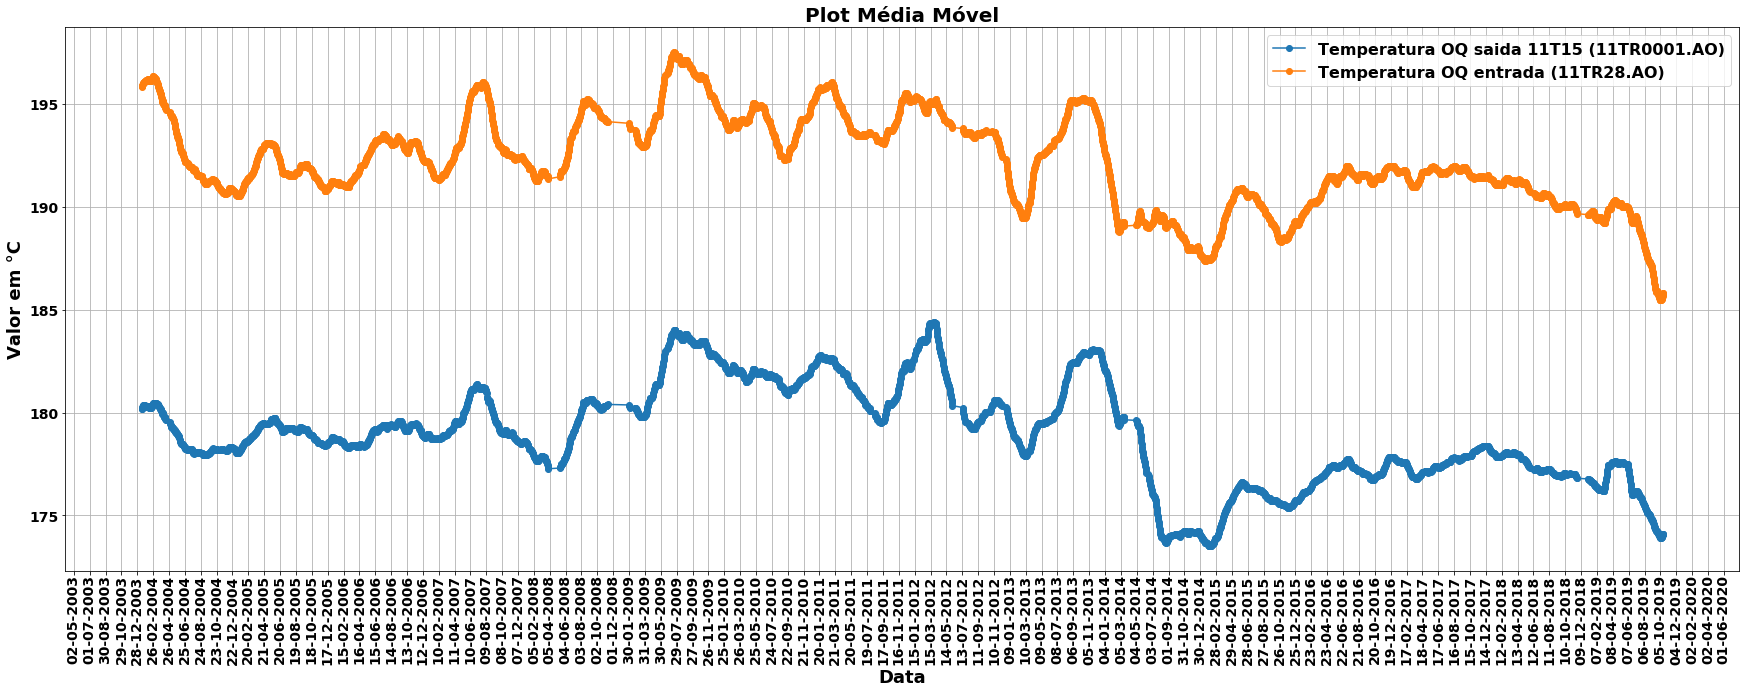

In [11]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot Média Móvel',
    'ylabel': 'Valor em °C',
    'rolling_time':90
}

plot_full(df, 
            [
            'Temperatura OQ saida 11T15 (11TR0001.AO)',
            'Temperatura OQ entrada (11TR28.AO)', 
            ],
            ini, fim, **params);

***
<a id='3p'></a>
### 3 - Plot da Tendência Móvel

(5435, 14)


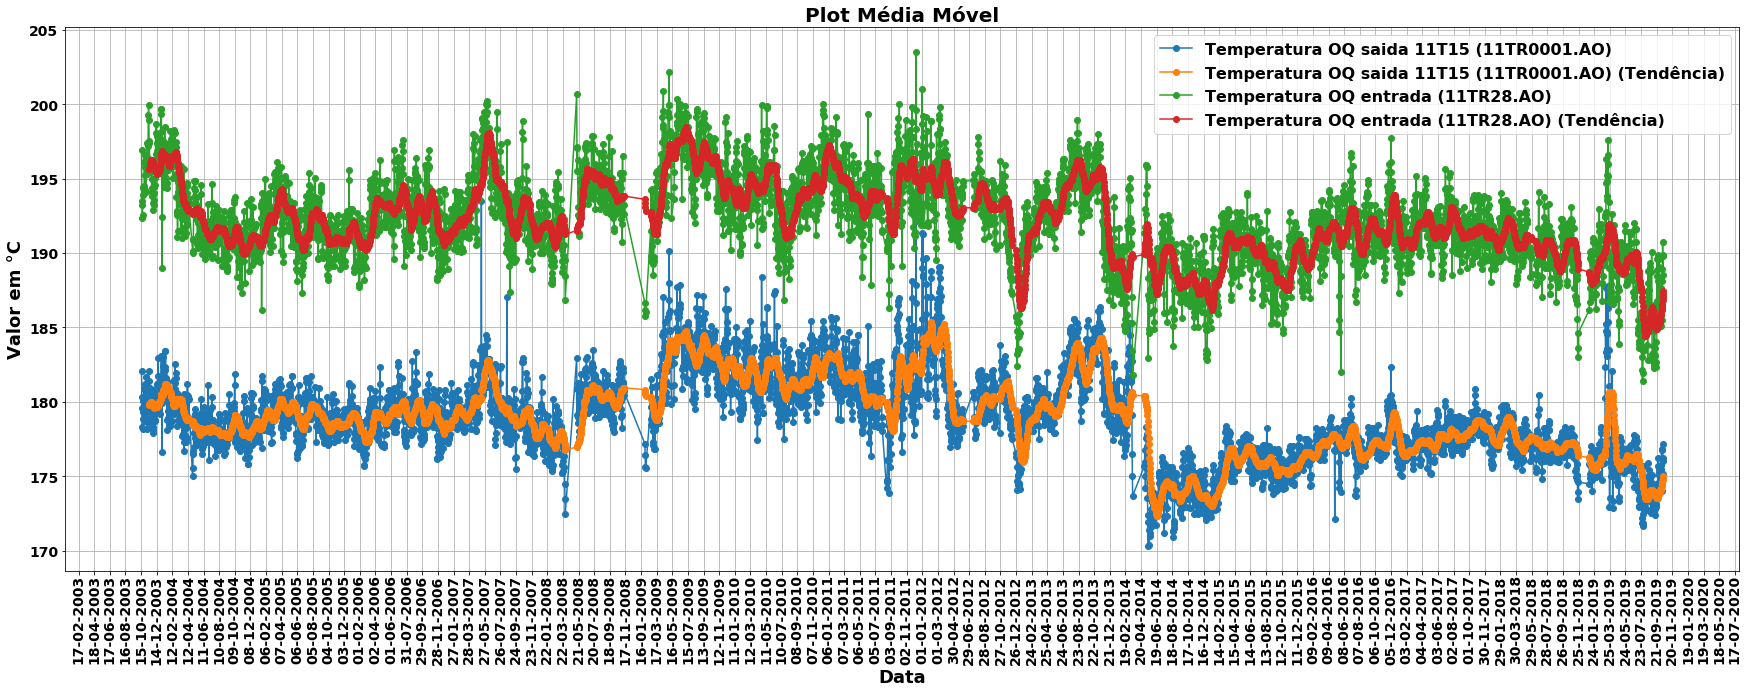

In [12]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot Média Móvel',
    'ylabel': 'Valor em °C',
    'rolling_time':30,
    'tendencia':True
}

plot_full(df, 
            [
            'Temperatura OQ saida 11T15 (11TR0001.AO)',
            'Temperatura OQ entrada (11TR28.AO)', 
            ],
            ini, fim, **params);

***
<a id='4p'></a>
### 4 - Plot o erro ABS duas variáveis

(5435, 14)


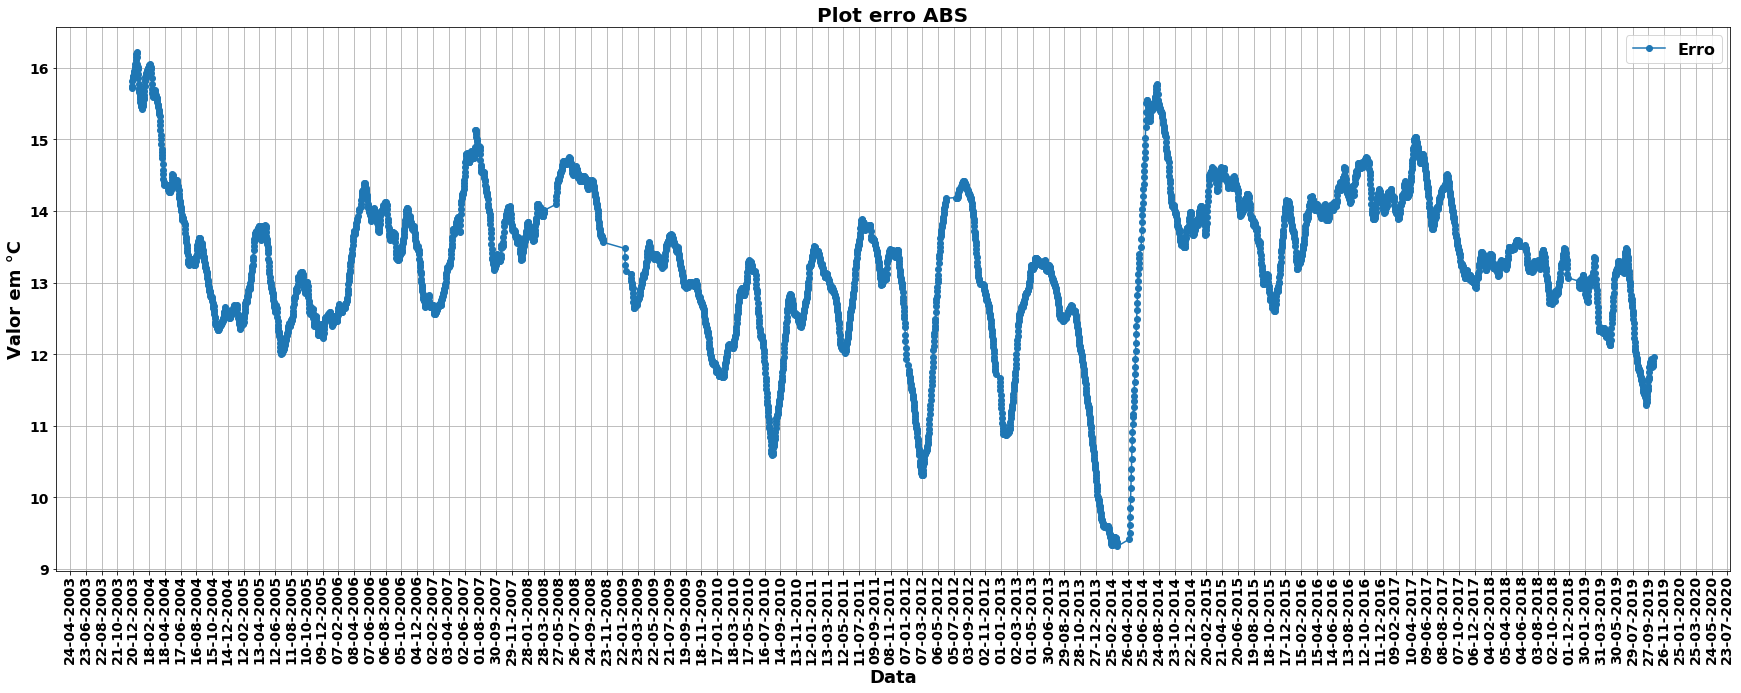

In [13]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot erro ABS',
    'ylabel': 'Valor em °C',
    'rolling_time':60,
    'error': True,
    'abs_error': True,
}

plot_full(df, 
            [
            'Temperatura OQ saida 11T15 (11TR0001.AO)',
            'Temperatura OQ entrada (11TR28.AO)',      
            ],
            ini, fim, **params);

***
<a id='5p'></a>
### 5 - Plot destacando momentos específicos de treino

(5435, 14)


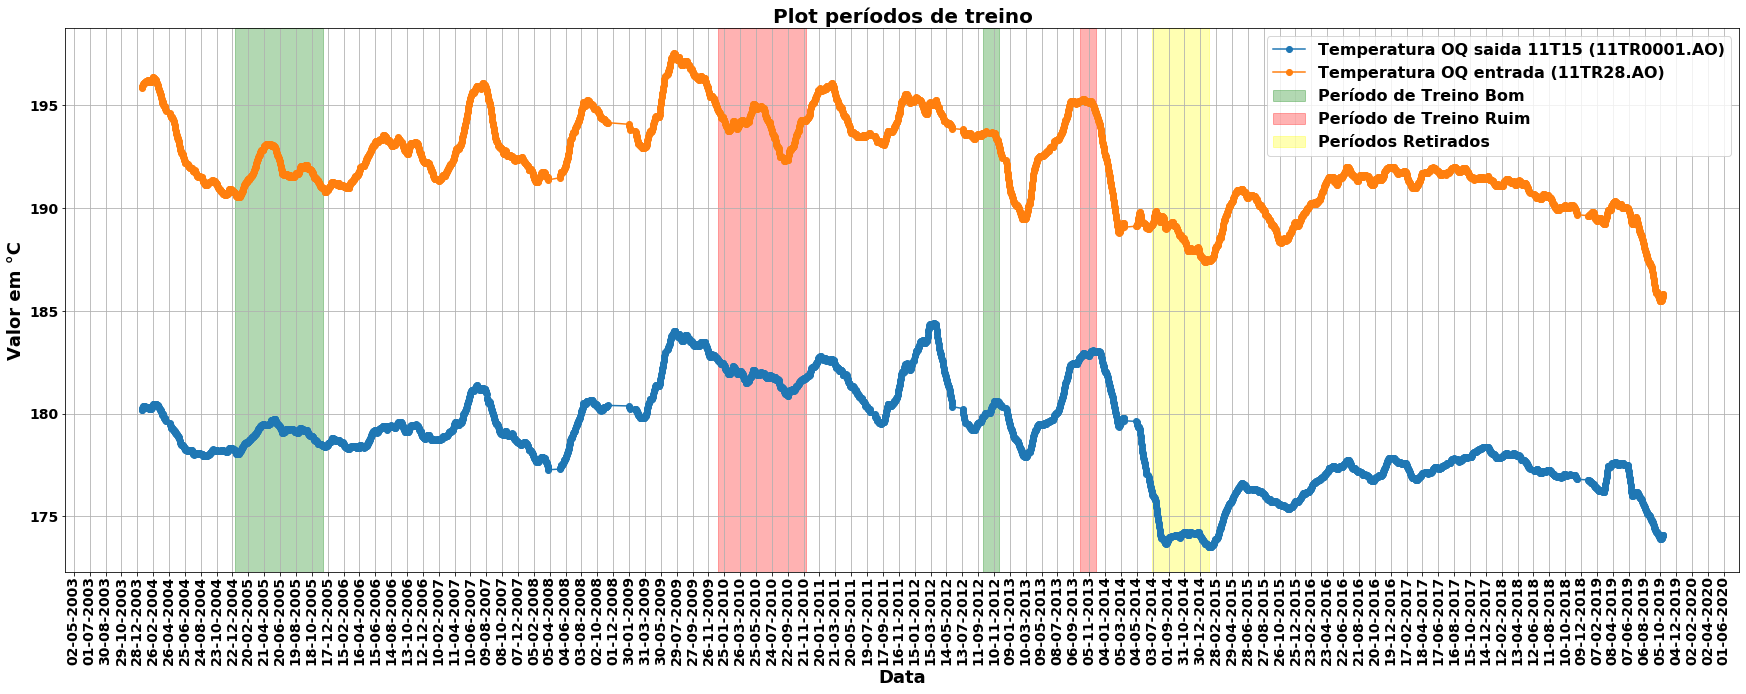

In [14]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot períodos de treino',
    'ylabel': 'Valor em °C',
    'rolling_time':90,
    'treino_true_data':[('2005-01-01 00:00:00','2005-12-01 00:00:00'),('2012-10-01 00:00:00','2012-12-01 00:00:00')], 
    'treino_true_color':'green', 
    'treino_true_alpha':0.3, 
    'treino_true_label':'Período de Treino Bom',
    'treino_false_data':[('2010-01-01 00:00:00','2010-12-01 00:00:00'),('2013-10-01 00:00:00','2013-12-01 00:00:00')], 
    'treino_false_color':'red', 
    'treino_false_alpha':0.3, 
    'treino_false_label':'Período de Treino Ruim',   
    'bloco_destaque_data':[('2014-07-01 00:00:00','2015-02-01 00:00:00')], 
    'bloco_destaque_color':'yellow', 
    'bloco_destaque_label':'Períodos Retirados', 
    'bloco_destaque_alpha':0.3,   
    'save_figure_name':os.path.join('out','img_teste.png')
}

plot_full(df, 
            [
            'Temperatura OQ saida 11T15 (11TR0001.AO)',
            'Temperatura OQ entrada (11TR28.AO)',      
            ],
            ini, fim, **params);

***
<a id='6p'></a>
### 6 - Plot destacando momentos específicos na horizontal de treino

(5435, 14)


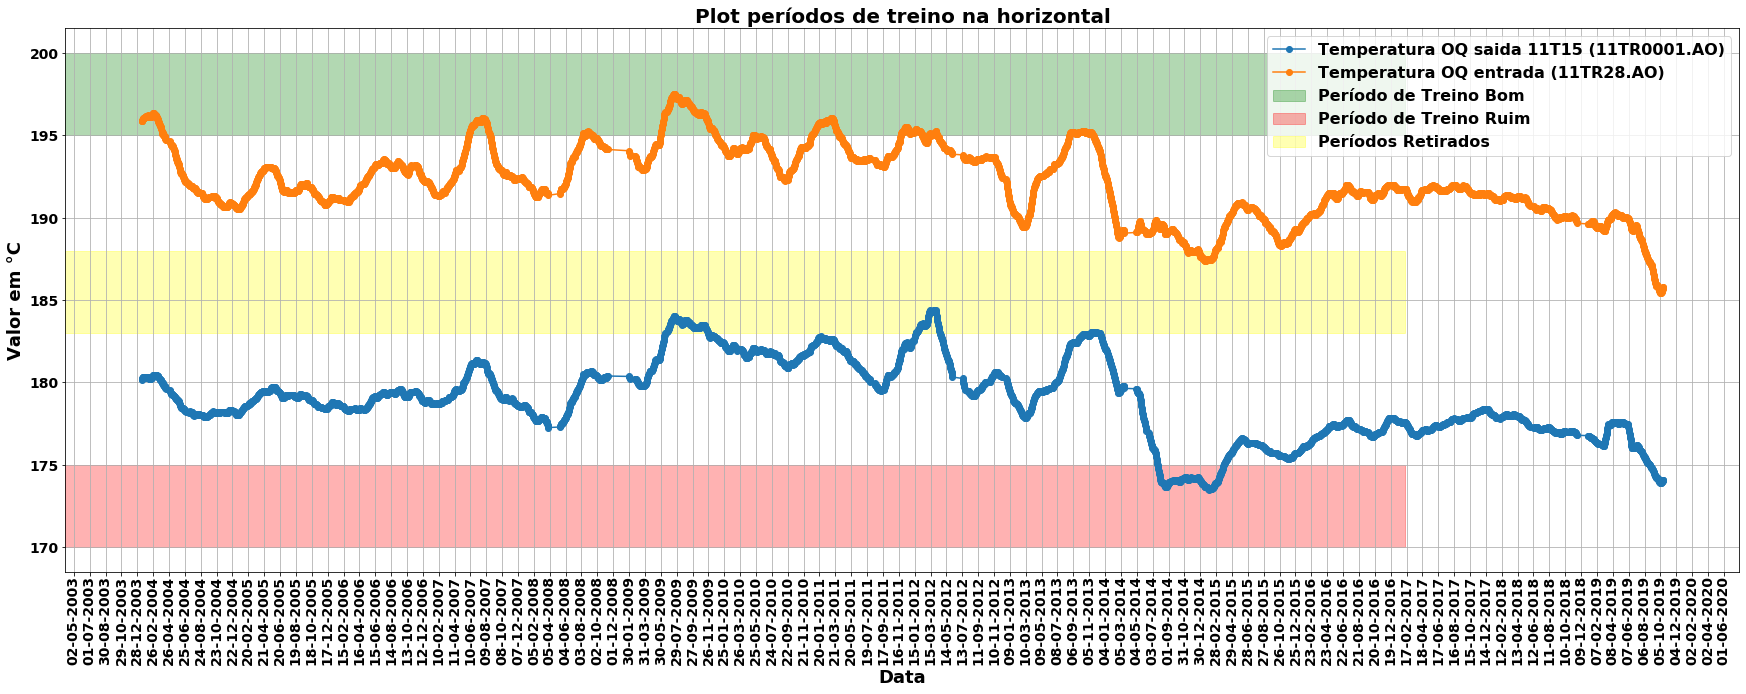

In [15]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot períodos de treino na horizontal',
    'ylabel': 'Valor em °C',
    'rolling_time':90,
    'treino_true_h_data':[{'ymin':195,'ymax':200, 'xmin':0, 'xmax':0.8}], 
    'treino_true_h_color':'green', 
    'treino_true_h_alpha':0.3, 
    'treino_true_h_label':'Período de Treino Bom',
    'treino_false_h_data':[{'ymin':170,'ymax':175, 'xmin':0, 'xmax':0.8}], 
    'treino_false_h_color':'red', 
    'treino_false_h_alpha':0.3, 
    'treino_false_h_label':'Período de Treino Ruim',   
    'bloco_destaque_h_data':[{'ymin':183,'ymax':188, 'xmin':0, 'xmax':0.8}], 
    'bloco_destaque_h_color':'yellow', 
    'bloco_destaque_h_label':'Períodos Retirados', 
    'bloco_destaque_h_alpha':0.3,  
}

plot_full(df, 
            [
            'Temperatura OQ saida 11T15 (11TR0001.AO)',
            'Temperatura OQ entrada (11TR28.AO)',      
            ],
            ini, fim, **params);

***
<a id='7p'></a>
### 7 - Plot para destaque de dias

(5435, 14)


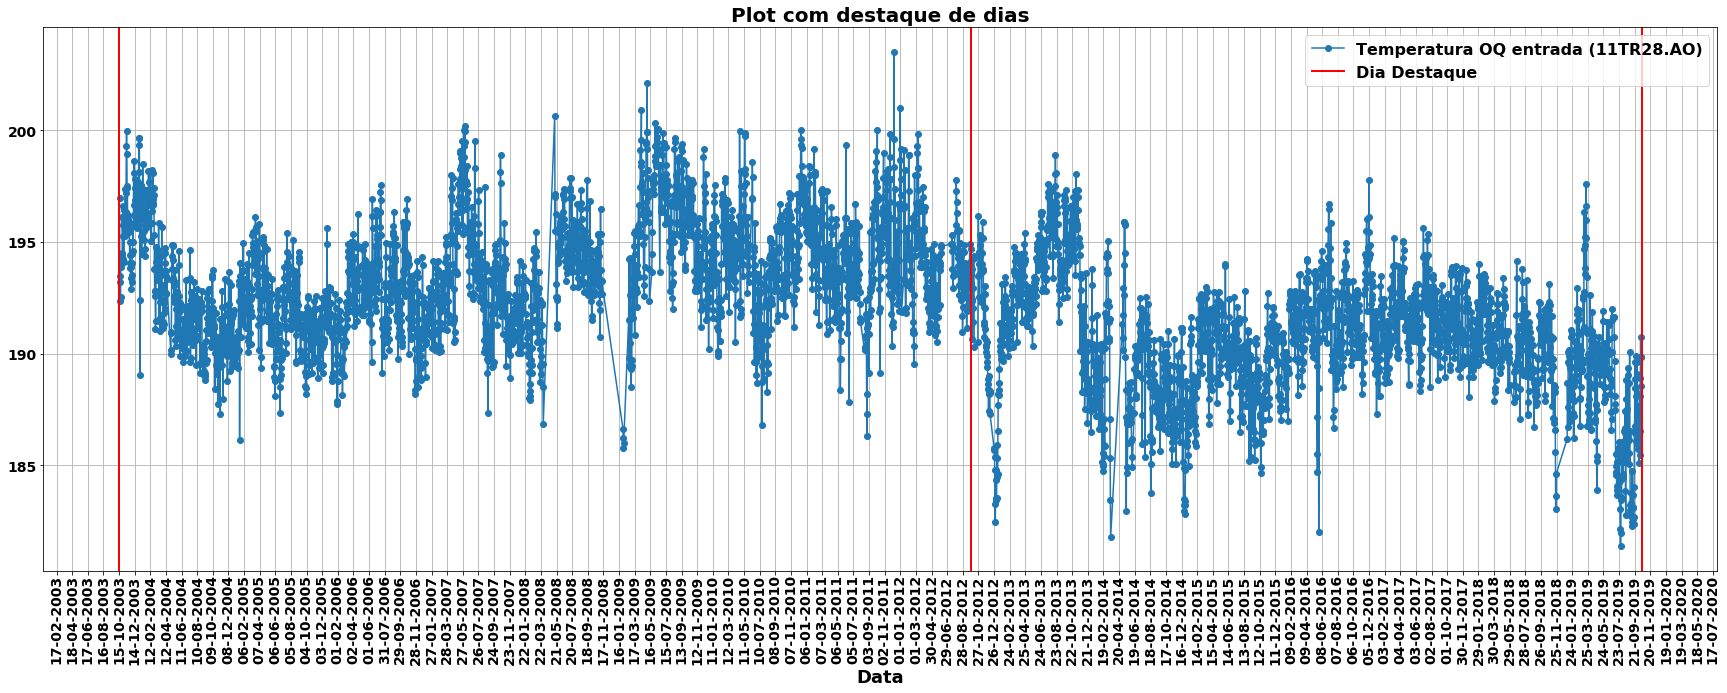

In [16]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot com destaque de dias',
    'dia_destaque_data':[ini,df.index[3000],fim], # obrigatorio formato timestamp
    'dia_destaque_color':'red', 
    'dia_destaque_label':'Dia Destaque',
  
}

plot_full(df, ['Temperatura OQ entrada (11TR28.AO)'] , ini, fim, **params);

***
<a id='8p'></a>
### 8 - Plot reta de tendência

(5435, 14)


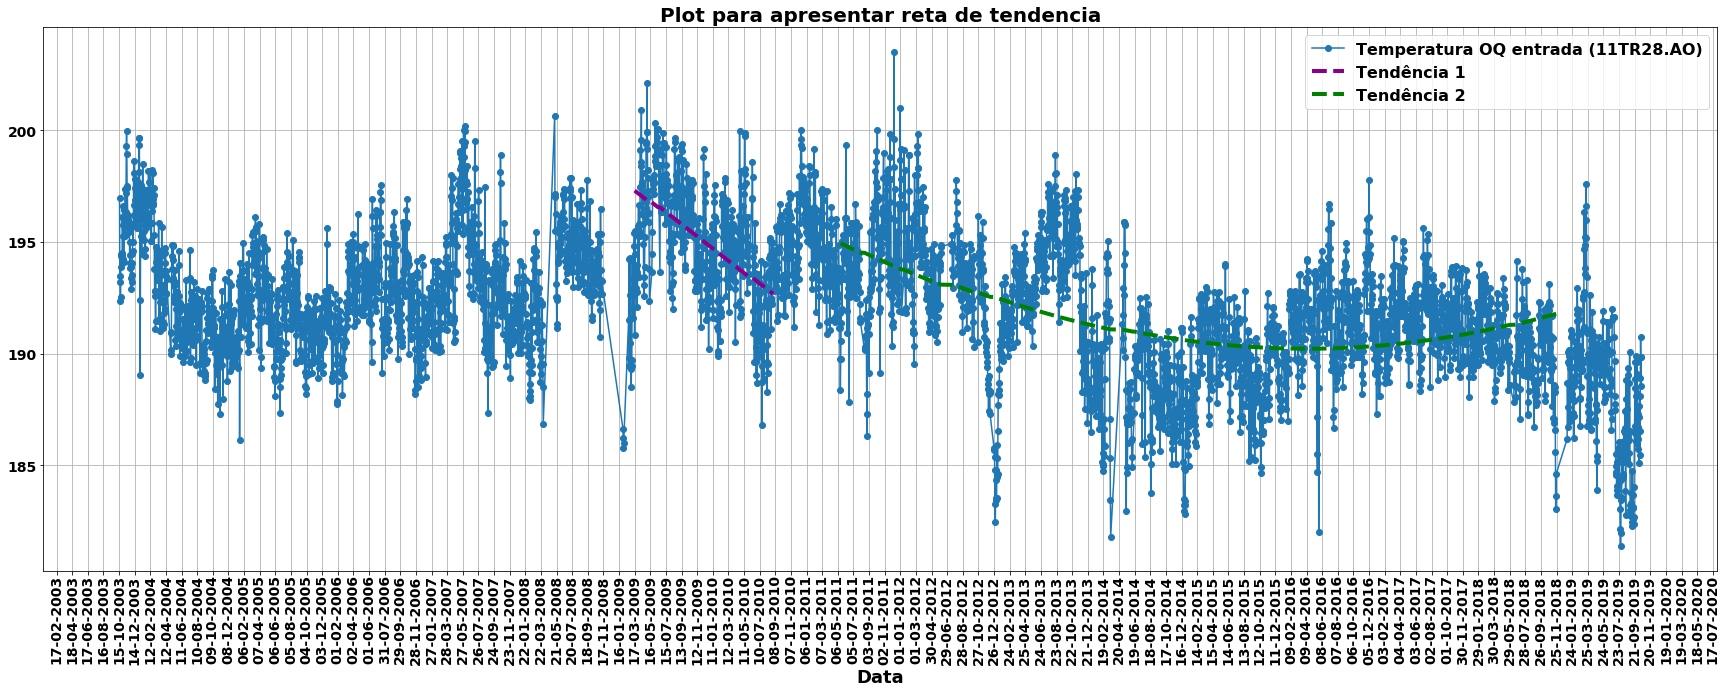

In [17]:
ini = df.index.min()
fim = df.index.max()

params = {
    'days_interval':60,
    'titulo': 'Plot para apresentar reta de tendencia',
    'reta_tendencia_data':[('2009-03-16 00:00:00','2010-09-01 00:00:00'),('2011-05-16 00:00:00','2019-01-01 00:00:00')],
    'reta_tendencia_color':['darkmagenta','green'],
    'reta_tendencia_label':['Tendência 1','Tendência 2'],
    'reta_tendencia_ordem':[1,2],
}

plot_full(df, ['Temperatura OQ entrada (11TR28.AO)'] , ini, fim, **params);

***
<a id='9p'></a>
### 9 - Análise da Distribuição e boxplot

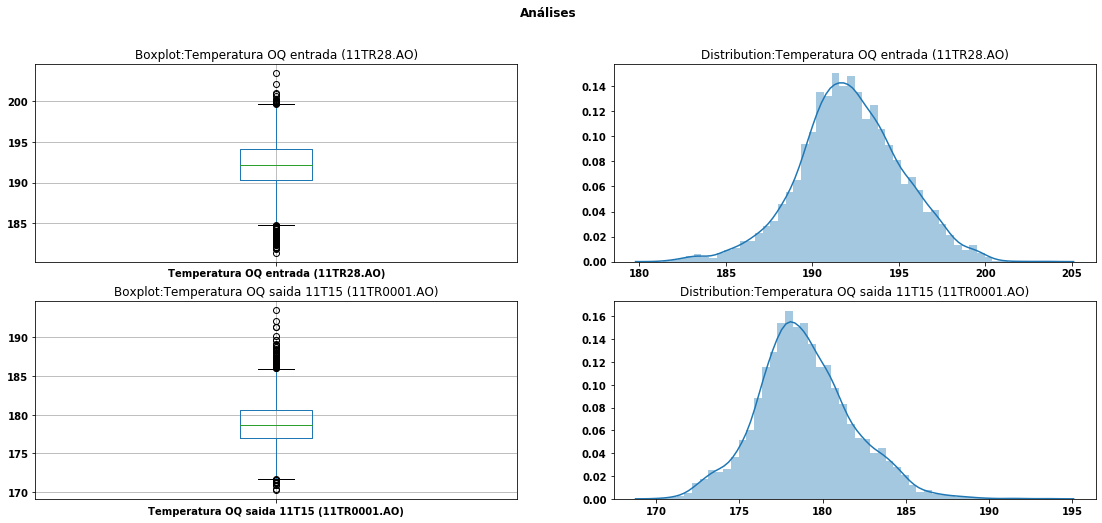

In [18]:
plot_dist(df,['Temperatura OQ entrada (11TR28.AO)','Temperatura OQ saida 11T15 (11TR0001.AO)'],'Análises')

***
<a id='10p'></a>
### 10 - Plot Correlação

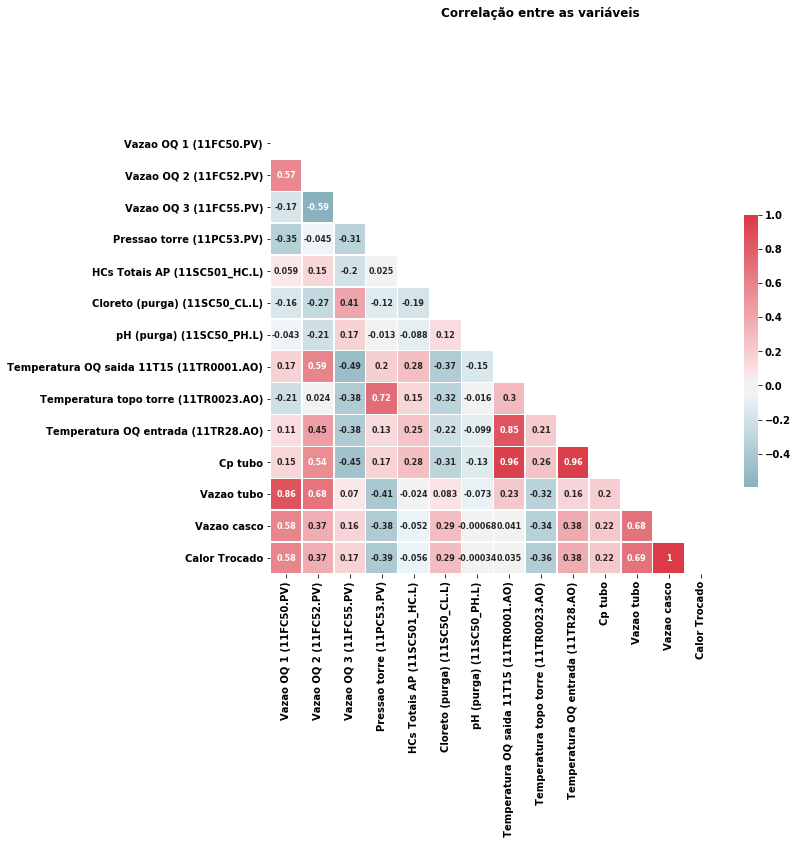

In [19]:
correlacao_var(df,size=(10,10),title="Correlação entre as variáveis",annot_size=8)

***
<a id='11p'></a>
### 11 - Plot Boxplot

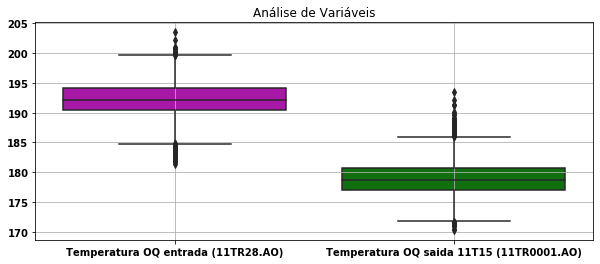

In [20]:
cols=['Temperatura OQ entrada (11TR28.AO)','Temperatura OQ saida 11T15 (11TR0001.AO)']

params = {
    'size': (10, 4),
    'color':['m','g'], # default "Paired"
    'titulo':'Análise de Variáveis',
    'ticker_num':5,
    'orientacao':'', # opcao de 'h' para horizontal
    'save_figure_name':''
}

plot_box(df, cols, **params)